In [191]:
#Problem 1 
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from math import log, pi, sqrt
from scipy.stats import t
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('problem1.csv', skiprows=1, header=None)
df.columns = ['x']


In [192]:
#P1(1)calculate the first four moments using formulas
mean_value_f = (df['x'].sum()/df['x'].count())
n = df['x'].count()

sum_squared_diff = 0
for x in df['x']:
    sum_squared_diff += (x - mean_value_f) ** 2
    
variance_f = (1/(n-1))*sum_squared_diff


sum_squared_tri = 0
for x in df['x']:
    sum_squared_tri += (x - mean_value_f) ** 3
    
standard_deviation_f=(variance_f)**(1/2)
skewness_f = (n/((n-1)*(n-2)))*(sum_squared_tri)/(standard_deviation_f**3)
skewness_f2 = sum_squared_tri/n/cm2**(3/2)
#kurtosis
cm2 = (1/(n))*sum_squared_diff
sum_squared_for = 0
for x in df['x']:
    sum_squared_for += (x - mean_value_f) ** 4

kurtosis_value_f = (sum_squared_for/n/cm2**2)-3
print("P1(1)calculate the first four moments using formulas")
print("\n")
print("Mean of x values:", mean_value_f)
print("Variance of x values:", variance_f)
print("Skewness of x values:", skewness_f)
print("Skewness of x values:", skewness_f2)
print("Kurtosis of x values:", kurtosis_value_f)

P1(1)calculate the first four moments using formulas


Mean of x values: 1.0489703904839585
Variance of x values: 5.427220681881726
Skewness of x values: 0.8819320922598405
Skewness of x values: 0.8806086425277374
Kurtosis of x values: 23.122200789989712


In [193]:
#P1(2)calculate the first four moments using pandas
mean_value = df['x'].mean()
variance = df['x'].var()
skewness = df['x'].skew()
kurtosis_value = df['x'].kurtosis()
print("#P1(2)calculate the first four moments using pandas")
print("\n")
print("Mean of x values:", mean_value)
print("Variance of x values:", variance)
print("Skewness of x values:", skewness)
print("Kurtosis of x values:", kurtosis_value)

#P1(2)calculate the first four moments using pandas


Mean of x values: 1.0489703904839585
Variance of x values: 5.427220681881727
Skewness of x values: 0.8819320922598395
Kurtosis of x values: 23.2442534696162


In [194]:
#P1(3)find if the package is biased
mean_diff = mean_value - mean_value_f
variance_diff = variance - variance_f
skewness_diff = skewness - skewness_f
kurtosis_diff = kurtosis_value - kurtosis_value_f
variance_diff = variance - variance_f

print("#P1(3)calculate thr difference")
print("mean_diff:", mean_diff)
print("variance_diff:", variance_diff)
print("skewness_diff:", skewness_diff)
print("kurtosis_diff:", kurtosis_diff)
print("\n")
print("Based on the output,all moments calculated by the package is closed to that comes out from formula, therefore the result is not biased")

#P1(3)calculate thr difference
mean_diff: 0.0
variance_diff: 8.881784197001252e-16
skewness_diff: -9.992007221626409e-16
kurtosis_diff: 0.12205267962648847


Based on the output,all moments calculated by the package is closed to that comes out from formula, therefore the result is not biased


In [195]:
#Problem 2 OLS
df2 = pd.read_csv('problem2.csv')

In [196]:
#OLS model by scikit-learn


Coefficient: 0.7752740987226111
Intercept: -0.08738446427005074
R-squared: 0.34560688356481273


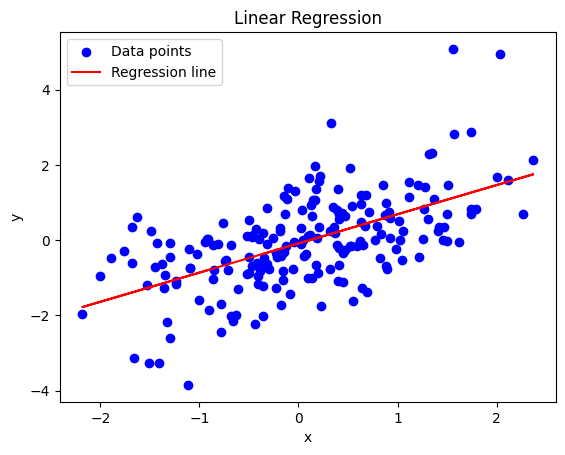

In [197]:

X = df2['x'].values.reshape(-1, 1)  # Reshaping for scikit-learn
y = df2['y']
model = LinearRegression()
model.fit(X, y)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

# To calculate R-squared
r_squared = model.score(X, y)
print("R-squared:", r_squared)
# Scatter plot of the data points
plt.scatter(df2['x'], df2['y'], color='blue', label='Data points')

# Predicted values for regression line
y_pred = model.predict(X)

# Line plot for the regression line
plt.plot(df2['x'], y_pred, color='red', label='Regression line')

# Adding labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [198]:
#OLS model by hand
#1 construct the [1 X] matrix

# Assuming df2 is your DataFrame and 'x' is the column to be included

# Create a column of ones - the length is the number of rows in df2
ones_column = np.ones((len(df2), 1))

# Select only the 'x' column and convert it to a numpy array
X_column = df2['x'].values.reshape(-1, 1)

# Concatenate the column of ones with the 'x' column
final_matrix = np.hstack((ones_column, X_column))

# Display the shape to confirm it's (n, m+1), which should be (n, 2) in this case
print("Shape of the final matrix:", final_matrix.shape)

# Display the first few rows of the final matrix
print("First few rows of the final matrix:\n", final_matrix[:5])


Shape of the final matrix: (200, 2)
First few rows of the final matrix:
 [[ 1.         -0.35933528]
 [ 1.          1.05019632]
 [ 1.         -0.41024159]
 [ 1.          0.18929365]
 [ 1.         -0.18392405]]


In [199]:
#construct the y column
Y_column = df2['y'].values.reshape(-1, 1)
Y_column[:5]

array([[-1.2059715 ],
       [ 0.24889196],
       [-0.95607912],
       [ 0.06844887],
       [ 0.33108392]])

In [200]:
# Calculate transpose of X
X_transpose = np.transpose(final_matrix)

# Calculate product of X_transpose and X
X_transpose_X = np.dot(X_transpose, final_matrix)

# Calculate inverse of X_transpose_X
X_transpose_X_inv = np.linalg.inv(X_transpose_X)

# Calculate product of inverse with X_transpose
X_transpose_X_inv_X_transpose = np.dot(X_transpose_X_inv, X_transpose)

# Calculate beta (β) coefficients
beta = np.dot(X_transpose_X_inv_X_transpose, Y_column)
print("P2(a) OLS model by hand")
print("\n")
print("Beta coefficients:\n", beta)


#find the standard deviation of the OLS errors
# Calculate residuals (errors)
errors = Y_column - np.dot(final_matrix, beta)

# Calculate squared residuals
e_transpose = np.transpose(errors)
squared_errors = np.dot(e_transpose, errors)

# Sum the squared residuals and divide by degrees of freedom (n - m - 1)
n = len(Y_column)  # Number of observations
m = final_matrix.shape[1] - 1  # Number of parameters estimated, minus 1 for the intercept
mean_squared_error = squared_errors.sum() / (n - m - 1)

# Standard deviation of the OLS error is the square root of the mean squared error
std_dev_ols_error = np.sqrt(mean_squared_error)

print("Standard deviation of the OLS error:", std_dev_ols_error)


P2(a) OLS model by hand


Beta coefficients:
 [[-0.08738446]
 [ 0.7752741 ]]
Standard deviation of the OLS error: 1.008813058320225


In [201]:
mean_value_q2 = X_column.mean()
variance_q2 = X_column.var()
mean_value
variance

5.427220681881727

In [205]:
#P2(a) MLE regression using normality
def neg_log_likelihood(params, x, y):
    beta = params[:-1]
    s = params[-1]
    e = y - x.dot(beta)
    s2 = s ** 2
    n = len(y)
    ll = -n / 2 * log(s2 * 2 * pi) - np.sum(e ** 2) / (2 * s2)
    return -ll

x_data = df2['x'].values
x_data_reshaped = np.vstack((np.ones(len(x_data)), x_data)).T
y_data = df2['y'].values
y_data = y_data.flatten()
initial_params = np.zeros(3)
result = minimize(neg_log_likelihood, initial_params, args=(x_data_reshaped, y_data), bounds=[(None, None), (None, None), (1e-10, None)])

beta_hat = result.x[:-1]
s_hat = result.x[-1]

neg_log_likelihood_value_normal = neg_log_likelihood(result.x, x_data_reshaped, y_data)
k_normal = len(result.x)  # number of parameters in the normal model
aic_normal = 2 * k_normal - 2 * (-neg_log_likelihood_value_normal)


print("#P2(a) MLE regression using normality")
print("\n")
print("Estimated coefficients (intercept, slope):", beta_hat)
print("Estimated standard deviation:", s_hat)
print("aic_normal:",aic_normal)

#P2(a) MLE regression using normality


Estimated coefficients (intercept, slope): [-0.08738271  0.77527479]
Estimated standard deviation: 1.0037562494030008
aic_normal: 575.0751261095829


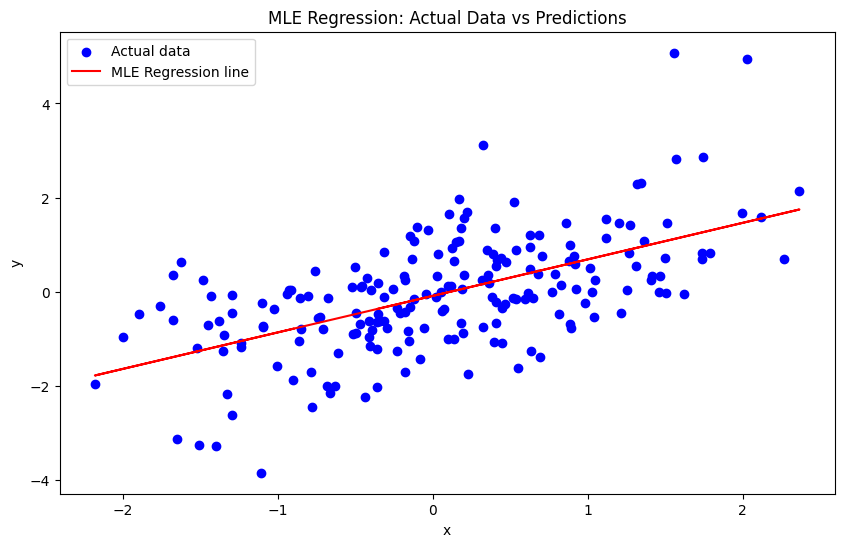

In [182]:
y_pred = np.dot(x_data_reshaped, beta_hat)

# Plotting the actual data versus the predictions
plt.figure(figsize=(10, 6))
plt.scatter(x_data_reshaped[:, 1], Y_column, color='blue', label='Actual data')  # Assuming x is in the second column of final_matrix
plt.plot(x_data_reshaped[:, 1], y_pred, color='red', label='MLE Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('MLE Regression: Actual Data vs Predictions')
plt.legend()
plt.show()

In [183]:
#the beta and also the standard deviation of OLS and MLE are the same

In [206]:
def neg_log_likelihood_t(params, x, y):
    beta = params[:-2]
    log_s = params[-2]  # work in log space to ensure positivity
    df = params[-1]
    s = np.exp(log_s)  # exponentiate to get scale
    e = y - x.dot(beta)
    
    # Ensure df is above a threshold, e.g., 2
    df = max(df, 2)
    
    ll = np.sum(t.logpdf(e, df, scale=s))
    return -ll

initial_params_t = np.zeros(x_data_reshaped.shape[1] + 2)
initial_params_t[-2] = np.log(1.0)  # start with log of scale parameter, e.g., log(1)
initial_params_t[-1] = 10  # degrees of freedom

# The bounds need to be set for the log of the scale parameter
# No upper bound for df to let the optimization find it, but you might want to set a realistic lower bound
bounds_t = [(None, None)] * (x_data_reshaped.shape[1]) + [(np.log(1e-10), None), (2, None)]

result_t = minimize(neg_log_likelihood_t, initial_params_t, args=(x_data_reshaped, y_data), bounds=bounds_t, method='L-BFGS-B')
beta_hat_t = result_t.x[:-2]
log_s_hat_t = result_t.x[-2]
df_hat = result_t.x[-1]

s_hat_t = np.exp(log_s_hat_t)  # exponentiate to get back to scale

neg_log_likelihood_value_t = neg_log_likelihood_t(result_t.x, x_data_reshaped, y_data)
k_t = len(result_t.x)  # number of parameters in the t-distribution model
aic_t = 2 * k_t - 2 * (-neg_log_likelihood_value_t)

print("P2(b) MLE regression using student-t distribution")
print("Estimated coefficients (intercept, slope):", beta_hat_t)
print("Estimated standard deviation (scale):", s_hat_t)
print("Estimated degrees of freedom:", df_hat)
print("MLE regression normal distribution is better since there is less standard deviation")
print("aic_t:", aic_t)

P2(b) MLE regression using student-t distribution
Estimated coefficients (intercept, slope): [-0.09722633  0.67498384]
Estimated standard deviation (scale): 0.8550386361158935
Estimated degrees of freedom: 7.158395858673411
MLE regression normal distribution is better since there is less standard deviation
aic_t: 570.5868076721636


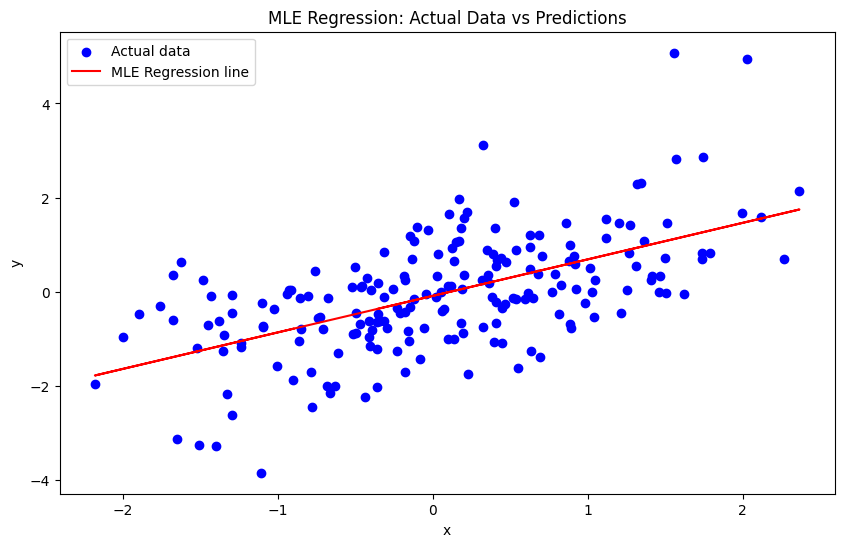

In [185]:
y_pred = np.dot(x_data_reshaped, beta_hat)

# Plotting the actual data versus the predictions
plt.figure(figsize=(10, 6))
plt.scatter(x_data_reshaped[:, 1], Y_column, color='blue', label='Actual data')  # Assuming x is in the second column of final_matrix
plt.plot(x_data_reshaped[:, 1], y_pred, color='red', label='MLE Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('MLE Regression: Actual Data vs Predictions')
plt.legend()
plt.show()


In [186]:
df3 = pd.read_csv('problem2_x.csv')


In [187]:
df4 = pd.read_csv('problem2_x1.csv')

#P2(C)
Estimated mean vector: [0.0010227  0.99024382]
Estimated covariance matrix:
 [[1.06977464 0.53068455]
 [0.53068455 0.96147329]]


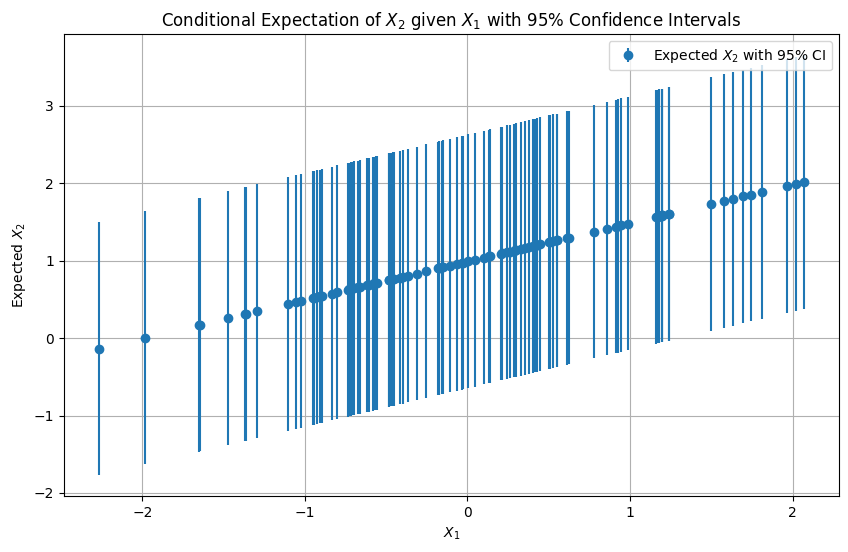

In [207]:
#P2(C)
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Assuming df3 is a DataFrame with your bivariate data ['x1', 'x2']
mean_vector = df3.mean().values
covariance_matrix = df3.cov().values

# Print the estimated parameters

print("#P2(C)")

print("Estimated mean vector:", mean_vector)
print("Estimated covariance matrix:\n", covariance_matrix)

# Now, let's derive the conditional distribution for each observed x1 in df4
# For the bivariate case, the conditional distribution of X2 given X1 is:
# X2|X1 ~ N(mu2 + Sigma21*Sigma11_inv*(X1 - mu1), Sigma22 - Sigma21*Sigma11_inv*Sigma12)

# Extract covariance matrix elements
sigma11 = covariance_matrix[0, 0]
sigma12 = covariance_matrix[0, 1]
sigma21 = covariance_matrix[1, 0]
sigma22 = covariance_matrix[1, 1]

# Calculate the inverse of Sigma11
sigma11_inv = 1.0 / sigma11

# Assuming df4 is a DataFrame with observed values of x1
observed_x1 = df4['x1'].values

# Calculate the parameters of the conditional distributions
conditional_means = mean_vector[1] + sigma21 * sigma11_inv * (observed_x1 - mean_vector[0])
conditional_variances = sigma22 - sigma21 * sigma11_inv * sigma12

# For a 95% confidence interval for a normal distribution, use 1.96 * std
std_errors = 1.96 * np.sqrt(conditional_variances)

# Plot the expected values and the confidence intervals
plt.figure(figsize=(10, 6))
plt.errorbar(observed_x1, conditional_means, yerr=std_errors, fmt='o', label='Expected $X_2$ with 95% CI')
plt.xlabel('$X_1$')
plt.ylabel('Expected $X_2$')
plt.title('Conditional Expectation of $X_2$ given $X_1$ with 95% Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()


In [189]:
#P3 AR (1) through AR (3) and MA (1) through MA (3),
df5 = pd.read_csv('problem3.csv')

In [190]:


# Assuming df5 is your DataFrame and it contains a column 'x' with your time series data
time_series = df5['x']

# Fit AR(1) through AR(3) and MA(1) through MA(3)
models = {}
for p in range(1, 4):
    ar_model = ARIMA(time_series, order=(p, 0, 0)).fit()
    models[f'AR({p})'] = ar_model

for q in range(1, 4):
    ma_model = ARIMA(time_series, order=(0, 0, q)).fit()
    models[f'MA({q})'] = ma_model

# Compare models based on AIC and BIC
aic_values = {model: models[model].aic for model in models}
bic_values = {model: models[model].bic for model in models}

best_aic_model = min(aic_values, key=aic_values.get)
best_bic_model = min(bic_values, key=bic_values.get)

print("Best model by AIC:", best_aic_model, "with AIC:", aic_values[best_aic_model])
print("Best model by BIC:", best_bic_model, "with BIC:", bic_values[best_bic_model])

# Output the model summaries
for model in models:
    print(f"\nSummary for {model}:")
    print(models[model].summary())


Best model by AIC: AR(3) with AIC: 1436.6598066945867
Best model by BIC: AR(3) with BIC: 1457.7328471866977

Summary for AR(1):
                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  500
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -819.328
Date:                Fri, 26 Jan 2024   AIC                           1644.656
Time:                        21:01:01   BIC                           1657.299
Sample:                             0   HQIC                          1649.617
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1258      0.070     30.473      0.000       1.989       2.263
ar.